In [376]:
#from google.colab import drive
#drive.mount('/content/drive')

In [377]:
import pandas as pd
import numpy as np

In [378]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [379]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [380]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [381]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [382]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=14:
        a.append(i)

In [383]:
df = df.drop(a)

In [384]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
33480,1958,1,9,27.0,12.3,39,-0.1,dadra and nagar haveli,dadra and nagar haveli,9,14,17,2,3,2,16,11
33481,1958,2,20,28.3,13.7,46,0.7,dadra and nagar haveli,dadra and nagar haveli,9,14,17,2,3,2,16,11
33482,1958,3,4,35.3,17.4,37,-0.4,dadra and nagar haveli,dadra and nagar haveli,9,14,17,2,3,2,16,11
33483,1958,4,25,38.4,23.5,39,-0.2,dadra and nagar haveli,dadra and nagar haveli,9,14,17,2,3,2,16,11
33484,1958,5,68,38.0,26.0,73,-0.9,dadra and nagar haveli,dadra and nagar haveli,9,14,17,2,3,2,16,11


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31992 entries, 33480 to 435239
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            31992 non-null  int64  
 1   Month           31992 non-null  int64  
 2   ppt(mm)         31992 non-null  int64  
 3   tmax(degC)      31992 non-null  float64
 4   tmin(degC)      31992 non-null  float64
 5   aet(mm)         31992 non-null  int64  
 6   PDSI(unitless)  31992 non-null  float64
 7   state           31992 non-null  object 
 8   district        31992 non-null  object 
 9   cluster14       31992 non-null  int64  
 10  cluster15       31992 non-null  int64  
 11  cluster18       31992 non-null  int64  
 12  cluster20       31992 non-null  int64  
 13  cluster25       31992 non-null  int64  
 14  cluster27       31992 non-null  int64  
 15  cluster30       31992 non-null  int64  
 16  cluster35       31992 non-null  int64  
dtypes: float64(3), int64(12), 

In [386]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(31992, 8)

In [387]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [388]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
33480,1958,1,9,27.0,12.3,39,-0.1,dadra and nagar haveli,1-1958
33481,1958,2,20,28.3,13.7,46,0.7,dadra and nagar haveli,2-1958
33482,1958,3,4,35.3,17.4,37,-0.4,dadra and nagar haveli,3-1958
33483,1958,4,25,38.4,23.5,39,-0.2,dadra and nagar haveli,4-1958
33484,1958,5,68,38.0,26.0,73,-0.9,dadra and nagar haveli,5-1958


In [389]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [390]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
33480,1958,1,9,27.0,12.3,39,-0.1,dadra and nagar haveli,1958-01-01,1
33481,1958,2,20,28.3,13.7,46,0.7,dadra and nagar haveli,1958-02-01,1
33482,1958,3,4,35.3,17.4,37,-0.4,dadra and nagar haveli,1958-03-01,1
33483,1958,4,25,38.4,23.5,39,-0.2,dadra and nagar haveli,1958-04-01,1
33484,1958,5,68,38.0,26.0,73,-0.9,dadra and nagar haveli,1958-05-01,1


In [391]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
33480,1958,1,9,39,-0.1,dadra and nagar haveli,1958-01-01,1,19.65
33481,1958,2,20,46,0.7,dadra and nagar haveli,1958-02-01,1,21.00
33482,1958,3,4,37,-0.4,dadra and nagar haveli,1958-03-01,1,26.35
33483,1958,4,25,39,-0.2,dadra and nagar haveli,1958-04-01,1,30.95
33484,1958,5,68,73,-0.9,dadra and nagar haveli,1958-05-01,1,32.00


In [392]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
435235,2019,8,555,107,2.6,cuttack,2019-08-01,1,29.00
435236,2019,9,358,97,3.2,cuttack,2019-09-01,1,28.90
435237,2019,10,360,102,4.1,cuttack,2019-10-01,1,28.80
435238,2019,11,12,67,3.3,cuttack,2019-11-01,1,25.70
435239,2019,12,12,50,3.1,cuttack,2019-12-01,1,22.15


In [393]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,ppt(mm),y,aet(mm),district
0,1981-01-01,38,17.65,50,dadra and nagar haveli
1,1981-02-01,28,20.60,49,dadra and nagar haveli
2,1981-03-01,34,24.80,64,dadra and nagar haveli
3,1981-04-01,94,27.45,104,dadra and nagar haveli
4,1981-05-01,147,28.90,142,dadra and nagar haveli


In [394]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
34212,2019,1,0,29,-4.5,dadra and nagar haveli,2019-01-01,1,18.15
34213,2019,2,27,43,-3.9,dadra and nagar haveli,2019-02-01,1,20.75
34214,2019,3,15,29,-3.8,dadra and nagar haveli,2019-03-01,1,25.25
34215,2019,4,38,45,-3.2,dadra and nagar haveli,2019-04-01,1,28.45
34216,2019,5,128,127,-2.0,dadra and nagar haveli,2019-05-01,1,31.25
...,...,...,...,...,...,...,...,...,...
435235,2019,8,555,107,2.6,cuttack,2019-08-01,1,29.00
435236,2019,9,358,97,3.2,cuttack,2019-09-01,1,28.90
435237,2019,10,360,102,4.1,cuttack,2019-10-01,1,28.80
435238,2019,11,12,67,3.3,cuttack,2019-11-01,1,25.70


In [395]:
from fbprophet import Prophet

In [396]:

model = Prophet()

In [397]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [398]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [399]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
19603,2018-08-01,349,28.60,113,cuttack
19604,2018-09-01,365,28.95,114,cuttack
19605,2018-10-01,185,27.45,115,cuttack
19606,2018-11-01,3,24.40,61,cuttack
19607,2018-12-01,9,21.30,51,cuttack


In [400]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [401]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [402]:

forecast = model.predict(fut)

In [403]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,25.263840,23.572698,31.223031,25.261057,25.267227,2.136329,2.136329,2.136329,2.136329,2.136329,2.136329,0.0,0.0,0.0,27.400169
465,2019-09-30,25.257995,22.292988,30.220217,25.254684,25.262645,1.007150,1.007150,1.007150,1.007150,1.007150,1.007150,0.0,0.0,0.0,26.265145
466,2019-10-31,25.251954,19.113928,26.502450,25.247800,25.257938,-2.531177,-2.531177,-2.531177,-2.531177,-2.531177,-2.531177,0.0,0.0,0.0,22.720778
467,2019-11-30,25.246109,15.221552,22.891999,25.240685,25.253286,-6.085885,-6.085885,-6.085885,-6.085885,-6.085885,-6.085885,0.0,0.0,0.0,19.160223
468,2019-12-31,25.240068,14.626933,21.669197,25.233669,25.248324,-7.100374,-7.100374,-7.100374,-7.100374,-7.100374,-7.100374,0.0,0.0,0.0,18.139694


In [404]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,27.400169,23.572698,31.223031
465,2019-09-30,26.265145,22.292988,30.220217
466,2019-10-31,22.720778,19.113928,26.502450
467,2019-11-30,19.160223,15.221552,22.891999
468,2019-12-31,18.139694,14.626933,21.669197


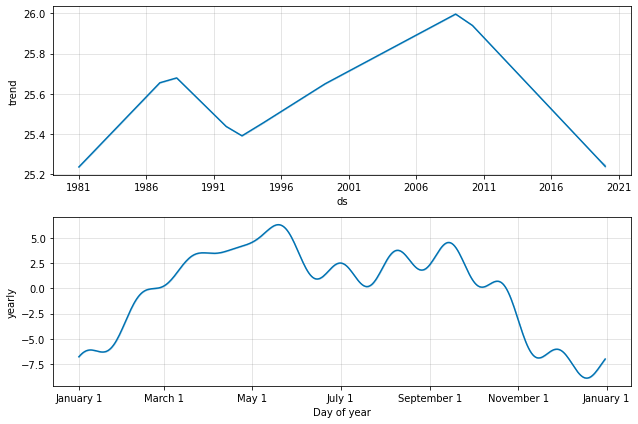

In [405]:
fig2 = model.plot_components(forecast)

In [406]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (516, 1)
15.824625031869504


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mid_temp,Month,yhat
0,18.15,1,21.140047
1,18.85,1,21.140047
2,20.80,1,21.140047
3,20.00,1,21.140047
4,19.65,1,21.140047
...,...,...,...
511,20.95,12,18.139694
512,21.30,12,18.139694
513,17.15,12,18.139694
514,17.45,12,18.139694


In [407]:
import matplotlib.pyplot as plt

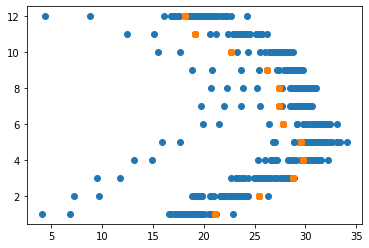

In [408]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [409]:
import pickle

In [410]:
filename = 'Cluster 15 - 14.sav'
pickle.dump(model, open(filename, 'wb'))

In [411]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [412]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,25.236502,14.511829,22.297208,25.236502,25.236502,-6.782900,-6.782900,-6.782900,-6.782900,-6.782900,-6.782900,0.0,0.0,0.0,18.453602
1,1981-02-01,25.242426,17.877687,25.744556,25.242426,25.242426,-3.683096,-3.683096,-3.683096,-3.683096,-3.683096,-3.683096,0.0,0.0,0.0,21.559330
2,1981-03-01,25.247777,21.577992,29.080748,25.247777,25.247777,0.245677,0.245677,0.245677,0.245677,0.245677,0.245677,0.0,0.0,0.0,25.493455
3,1981-04-01,25.253702,25.040912,32.825309,25.253702,25.253702,3.479066,3.479066,3.479066,3.479066,3.479066,3.479066,0.0,0.0,0.0,28.732768
4,1981-05-01,25.259435,25.680772,33.594557,25.259435,25.259435,4.567240,4.567240,4.567240,4.567240,4.567240,4.567240,0.0,0.0,0.0,29.826675
